# Preprocessing

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Importing the dataset

In [225]:
df = pd.read_stata('Main_dataset.dta')

/Users/vaibhavghildiyal/opt/anaconda3/lib/python3.7/site-packages/pandas/io/stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [228]:
df.head()

,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,B2,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,Yes,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.617645,Rural
1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.042023,Rural
2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.042023,Rural
3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.042023,Rural
4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,Yes,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.042023,Rural


### Picking out the column for analysis

In [229]:
df_new= df[['C22']]

In [230]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C22     1478 non-null   float64
dtypes: float64(1)
memory usage: 51.5 KB


### Printing the new dataset

In [232]:
df_new.head()

,C22
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [233]:
df_new.tail()

,C22
3290,NaN
3291,4.65
3292,6.05
3293,4.65
3294,NaN


### Dropping out the missing values (NaN)

In [234]:
df_new=df_new.dropna()

In [235]:
df_new.head()

,C22
6,9.30
8,37.21
12,9.30
13,2.33
17,6.98


In [236]:
df_new.describe()

,C22
count,1478.000000
mean,20.231604
std,30.050734
min,2.000000
25%,4.650000
50%,9.300000
75%,23.260000
max,400.000000


### Adding column "TIER" to the dataset with respect to household's power consumption

In [237]:
def conditions(C22):
    if C22 <3:
        return "0"
    elif 3<C22<50:
        return "1"
    elif 50<C22<200:
        return "2"
    elif 200<C22<800:
        return "3"
    elif 800<C22<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_new.C22)
df_new["TIER"] = transform

In [238]:
df_new.head()

,C22,TIER
6,9.30,1
8,37.21,1
12,9.30,1
13,2.33,0
17,6.98,1


### Printing the TIER counts

In [239]:
df_new['TIER'].value_counts()

1    1227
0     143
2     103
3       5
Name: TIER, dtype: int64

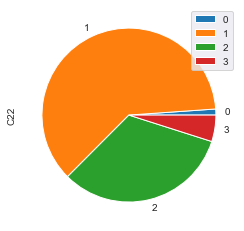

In [240]:
df_new.groupby(['TIER']).sum().plot(kind='pie', y='C22')